# Q1: using cifar10 data set build convolutional neural network

In [2]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset, metadata = tfds.load('cifar10', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteZPLSKI/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteZPLSKI/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [4]:
# Number of classes
len(metadata.features["label"].names)

10

In [5]:
# Classes
metadata.features["label"].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
metadata.features

FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

In [7]:
print(f'No of train : {len(train_dataset)}\nNo of test : {len(test_dataset)}')

No of train : 50000
No of test : 10000


In [8]:
# Normalization
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

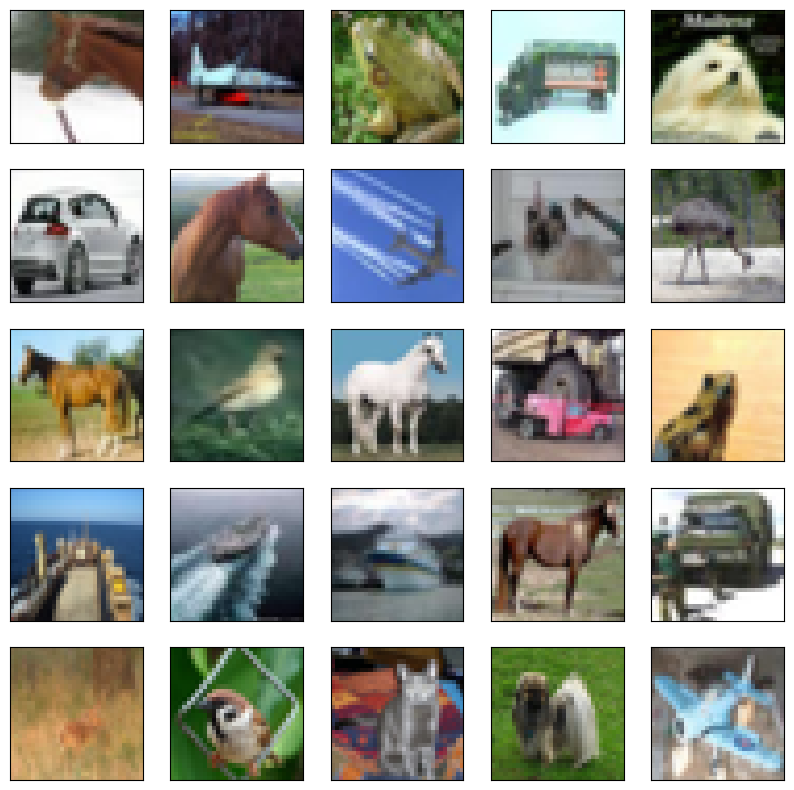

In [9]:
# Plot test sample
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    #image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [10]:
# Convert to batches
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(50000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

## Model

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3), strides = 2),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
hist = model.fit(train_dataset, epochs=15, steps_per_epoch=math.ceil(50000/BATCH_SIZE))

Epoch 1/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5772 - accuracy: 0.4189
Epoch 2/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2334 - accuracy: 0.5576
Epoch 3/15
1563/1563 [==============================] - 27s 18ms/step - loss: 1.0873 - accuracy: 0.6139
Epoch 4/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9962 - accuracy: 0.6456
Epoch 5/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9363 - accuracy: 0.6699
Epoch 6/15
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8777 - accuracy: 0.6895
Epoch 7/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8255 - accuracy: 0.7089
Epoch 8/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7736 - accuracy: 0.7253
Epoch 9/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7243 - accuracy: 0.7436
Epoch 10/15
1563/1563 [==============================] - 28s 18m

In [25]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 1.1101 - accuracy: 0.6613
Accuracy on test dataset: 0.661300003528595


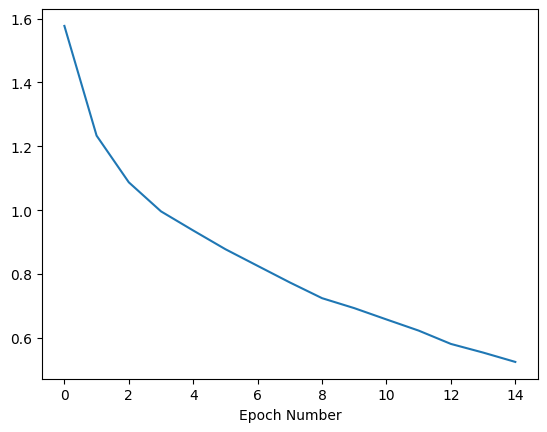

In [26]:
# How loss changes with epochs:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);

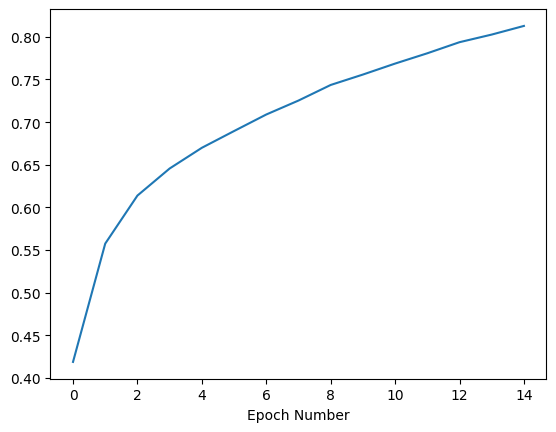

In [27]:
# How accuracy changes with epochs:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['accuracy']);

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 64)        

## Confusion Matrix

In [29]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [33]:
dataset, metadata = tfds.load('cifar10', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [34]:
validation_batches = test_dataset.batch(BATCH_SIZE)
validation_batches

<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

313/313 [==============================] - 3s 10ms/step


(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

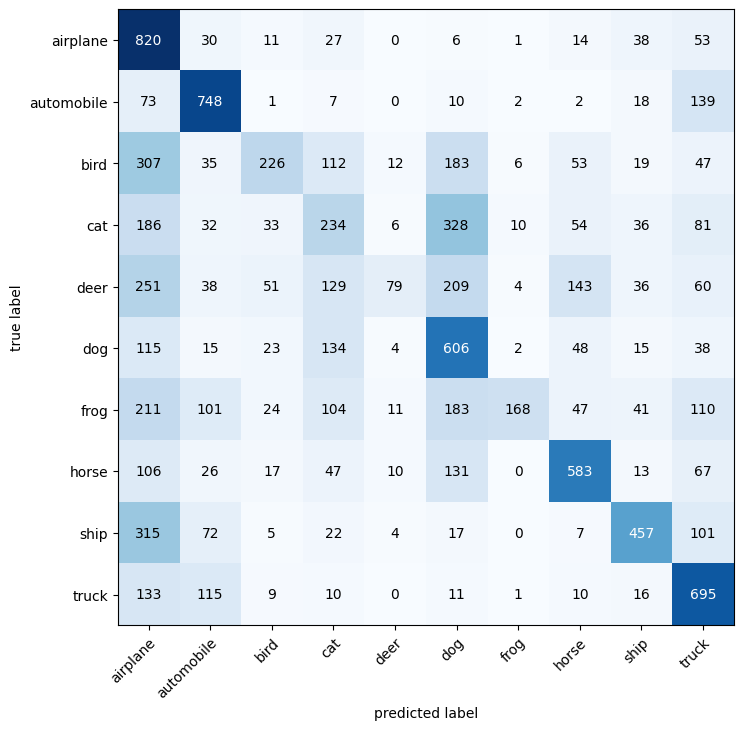

In [35]:
validation_batches = test_dataset.batch(BATCH_SIZE)

pred = model.predict(validation_batches)
pred = np.argmax(pred,axis=1)
true = tf.concat([y for x,y in validation_batches],axis=0)
mat = confusion_matrix(true,pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8), class_names=metadata.features['label'].names)